# Projects

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2Fprojects.ipynb)

<div class="alert alert-block alert-warning">
    <b>Schedule</b>
    
- Ask your supervisors for the data if not already provided (it is not included in this repository).
- Quick presentation.
- Final project presentation.
    
</div>

<div class="alert alert-block alert-info">
    <b>One problematic, One dataset, One (or more) method(s)</b>
    
- Quality of the dataset is key.
- Results on a clean notebook.
- Explain which method(s) you used and why.
- If a method fails, explain why.

</div>

## Project: Forecast of El Nino

<img alt="weather" src="images/ENSO-normal.png" width=400 style="float:left">
<img alt="weather" src="images/ENSO-El_Nino.png" width=400 style="float:right">

- Natural mode of variability of the pacific equatorial ocean
- Big impact on the local economy
- Question: What is the predictability of El Nino?

### Data set

<img alt="weather" src="images/monthly-sst-lanina-normal-elnino.png" width=400>

- Variable: Global sea surface temperature (SST)
- Temporal resolution: monthly mean
- Spatial resolution: 1 degree$\times$1 degree

### First steps

- Read about El nino
- Characterize El nino: i.e. introduce a classifier
- What does it mean ``to make a prediction''?

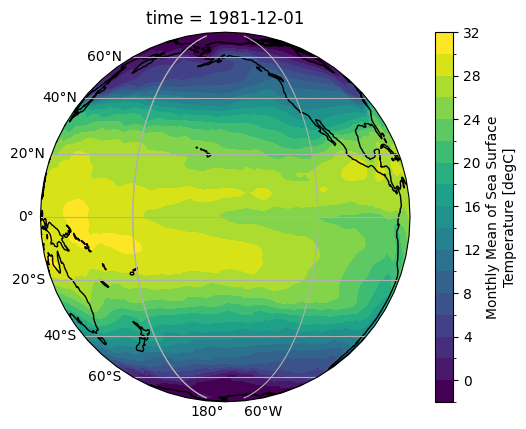

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

dir0 = Path('el_nino/')
file_sst = 'sst.mnmean.nc'

# load the data set with xarray
ds = xr.open_dataset(Path(dir0, file_sst))

# the name of the variable is 'sst'
p = ds["sst"].isel(time=0).plot.contourf(levels=20, center=False,
                                         subplot_kws=dict(projection=ccrs.Orthographic(-150, 0), facecolor="gray"),
                                         transform=ccrs.PlateCarree())
p.axes.coastlines()
gl = p.axes.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

In [ ]:
# El Nino years
# 1982-83, 1997-98, 2002-2003, 2004-2005, 2006-2007, 2009-2010
# 2014-2016, 2018-2019, 2023

# research question: given an input of 15 months, can we determine 
# if the period encompasses an el nino or la nina atmopsheric cycle?

# motivation:
# machine learning methodology: supervised learning with Neural Network
# feature extraction: talk to prof about PCA: input is too large, dimension reduction to extract the features
# loss function: square loss function
# evaluation method: k-fold cross validation, we will need to label the data

# data description
# input: five consecutive 3-month running mean SST anomalies (5 x space dimension)
# the region we will be extracting is the El Nino 3.4 region

# output: "el nino", "la nina", "neutral"
# label can be found here: https://ggweather.com/enso/oni.htm
# ONI index until 2023 : https://www.ncei.noaa.gov/access/monitoring/enso/sst



# criteria for el nino: five consecutive 3-month running mean SST anomalies exceed the threshold
# thershold:  threshold of +/-0.5°C
# https://www.ncei.noaa.gov/access/monitoring/enso/sst#:~:text=The%20criteria%2C%20that%20is%20often,SST%20anomalies%20exceed%20the%20threshold.
